In [1]:
%matplotlib inline
import os, pickle
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

font_path = "/home/zhoujb/local/font/times.ttf"
mpl.font_manager.fontManager.addfont(font_path)
prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.sans-serif'] = ["Times New Roman"]

RAW_PATH = "/data2/zhoujb/project/cowpea_project/rawData/"
SNP_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/snpDir/"
CLUSTER_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/SNPMMSeqCluster/"
RES_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/Result/"
FIG_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/plotFigure/"

In [2]:
raw_phenos = pd.read_excel(os.path.join(RAW_PATH, "Phenotypes for GWAS-upload public database.xlsx"), index_col="Accessions")
raw_phenos = raw_phenos.drop(columns="ID")
raw_phenos = raw_phenos.replace({"-":np.nan})
raw_phenos = raw_phenos.dropna(axis=0, how="all")
raw_phenos = raw_phenos.rename(columns={'HZ-Pod length':'HZ-PL', 'GZ-Pod length':'GZ-PL', 
                                        'HZ Pod Sugar content (mg/g)':'HZ-PSugar','GZ Pod Sugar content  (mg/g)':'GZ-PSugar', 
                                        'HZ Pod Starch content(mg/g)':'HZ-PStarch','GZ Pod Strach Content (mg/g)':'GZ-PStarch', 
                                        'HZ Pod Protein content(g/Kg)':'HZ-PProtein','GZ Pod protein  (g/Kg)':'GZ-PProtein', 
                                        'HZ Seed Sugar (mg/g)':'HZ-SSuger','GZ Seed Sugar (mg/g)':'GZ-SSuger', 
                                        'HZ Seed Starch (mg/g)':'HZ-SStarch','GZ Seed Starch (mg/g)':'GZ-SStarch', 
                                        'HZ Seed Protein (g/kg)':'HZ-SProtein','GZ Seed Protein (g/kg)':'GZ-SProtein', 
                                        'Pod shattering':'PS'})

samples_score_info = pd.read_table(os.path.join(RES_PATH, "Samples_Score_Info.tsv"), index_col="Sample")
samples_score_info = samples_score_info.drop(columns=[ 'Class', 'Mis_Hap_Num'])
samples_score_info = samples_score_info.rename(columns={'Hap_Score.by_Total_pop':'Total_score', 
                                                        'Hap_Score.by_VL_pop':'VL_score',
                                                        'Hap_Score.by_G_pop':'G_score',
                                                        'Hap_Score.by_VC_pop':'VC_score'})
samples_score_info = samples_score_info[["Total_score"]]

inte_sample_list = list(set(raw_phenos.index).intersection(samples_score_info.index.to_list()))
raw_phenos = raw_phenos.loc[inte_sample_list]
samples_score_info = samples_score_info.loc[inte_sample_list]

detail_info = pd.read_excel(os.path.join(RAW_PATH, "Detail_information_344.xlsx"), index_col="Genotype No.")
detail_info["Type"] = detail_info["Types"].map({'Grain':"G", 'V-landrace':"VL", '-':"NA", 'V-cultivar':"VC"})
detail_info = detail_info.loc[inte_sample_list]
detail_info = detail_info[["Type"]]

phenos_add_score = pd.concat([raw_phenos, samples_score_info, detail_info], axis=1)

In [3]:
phenos_add_score

,HZ-PL,GZ-PL,HZ-PSugar,GZ-PSugar,HZ-PStarch,GZ-PStarch,HZ-PProtein,GZ-PProtein,HZ-SSuger,GZ-SSuger,HZ-SStarch,GZ-SStarch,HZ-SProtein,GZ-SProtein,PS,HZ-TSW,GZ-TSW,HZ-GNP,Total_score,Type
D404,32.200,25.800,8.666861,16.0368,9.493493,16.843883,27.380025,21.720907,76.767000,91.473924,304.395055,201.463564,272.765625,250.265,0.0,126.16175,128.0635,18.5,86.485532,VL
D468,26.150,27.050,10.639822,10.9434,12.286679,16.781267,24.337763,21.823079,72.118378,87.512042,405.849730,199.652283,258.681250,258.070,0.0,125.02765,146.0580,15.8,72.248182,VL
D574,39.475,35.750,11.873554,17.7684,10.492248,14.782350,26.536674,22.538087,73.863927,76.428362,358.716435,251.036212,262.187500,245.285,0.0,106.34740,148.5232,17.8,92.973910,VL
D582,38.875,40.400,11.098346,13.3380,9.215614,13.770850,26.464201,NaN,69.357600,76.504335,366.856600,329.085143,263.953125,277.670,0.0,164.50070,179.0777,17.8,90.209999,VL
D459,47.475,53.325,10.057680,17.7567,10.664499,15.064125,22.435730,21.092186,90.519474,83.477474,343.490248,202.569055,278.268750,262.205,0.0,126.45465,111.4479,16.3,91.495397,VL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D544,46.500,53.150,13.485556,16.7817,10.550661,15.504850,24.288399,22.526398,83.795259,79.831769,364.524323,192.474266,276.865625,277.160,0.0,92.45845,92.2420,13.6,89.391637,VL
D707,15.750,15.000,9.020195,9.4926,11.333272,18.491183,26.704877,23.609571,119.844706,95.069957,428.513333,358.437426,218.300000,254.150,0.0,114.33330,136.0049,13.4,27.190188,G
D499,54.800,54.050,15.634522,15.1164,13.205985,14.869050,19.972499,21.427350,102.982075,97.016045,376.845094,240.868154,262.456250,248.220,0.0,124.46625,149.8791,18.2,89.954926,VL
D406,58.250,55.600,16.000960,14.8005,15.990280,16.025050,18.686776,19.980256,87.038293,92.157596,325.814212,221.840471,269.268750,271.255,0.0,112.88720,147.7636,13.1,96.896084,VC


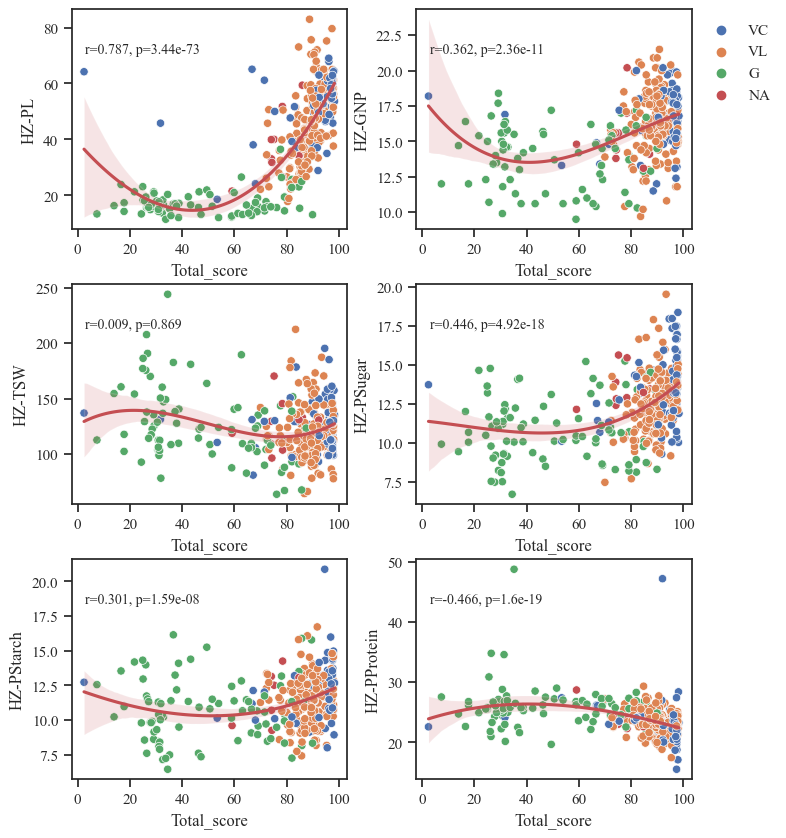

In [5]:
hz_col = ['HZ-PL', 'HZ-GNP', 'HZ-TSW', 'HZ-PSugar', 'HZ-PStarch', 'HZ-PProtein']
sns.set(font_scale=1, style="ticks")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
fig.subplots_adjust(wspace=0.25, hspace=0.25)
for num in range(len(hz_col)):
    mpl.rcParams['font.family'] = prop.get_name()
    mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
    
    if num == 1:
        sns.scatterplot(x="Total_score", y=hz_col[num], hue="Type", data=phenos_add_score, 
                        ax=axes[num//2, num%2], hue_order=['VC', 'VL', 'G', 'NA'])
        axes[num//2, num%2].legend(bbox_to_anchor=(1, 1), frameon=False)
    else:
        sns.scatterplot(x="Total_score", y=hz_col[num], hue="Type", data=phenos_add_score, 
                        ax=axes[num//2, num%2],  hue_order=['VC', 'VL', 'G', 'NA'], legend=None)
    sns.regplot(x="Total_score", y=hz_col[num], data=phenos_add_score, 
                ax=axes[num//2, num%2], ci=95, order=3, scatter=False, color="r")
    r, pvalue = stats.spearmanr(phenos_add_score["Total_score"].values, phenos_add_score[hz_col[num]].values, nan_policy="omit")

    #if pvalue < 0.001:
        #anno_label = 'r={:.3f}, p<0.001'.format(r)
    #else:
        #anno_label = 'r={:.3f}, p={:.3f}'.format(r, pvalue)
    anno_label = 'r={:.3f}, p={:.3g}'.format(r, pvalue)

    axes[num//2, num%2].text(.05, .8, anno_label, transform=axes[num//2, num%2].transAxes, font_properties=prop)

plt.savefig(os.path.join(FIG_PATH, 'Fig_1C_HZ_corr_scatter.pdf'), format='pdf', bbox_inches='tight', transparent=True)

In [18]:
phenos_add_score["Type"].unique()

array(['VC', 'VL', 'G', 'NA'], dtype=object)